# DATA ASSIMILATION ASSIGNMENT TWO

# NAME: BORTEY BEGOR BENEDICT 

# INDEX NUMBER: 4291720

In [20]:
#IMPORTING PACKAGES
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

# DATA ASSIMILATION WITH KALMAN FILTER

In [21]:
# Sample observational data (in degrees Celsius)
observations = np.array([15.2, 16.1, 14.5, 15.8, 25.0])

# Sample model predictions (in degrees Celsius)
model_output = np.array([14.8, 15.5, 14.0, 16.0, 25.3])

# Kalman Filter parameters
initial_state = model_output[0]
initial_uncertainty = 1.0  # Initial uncertainty (high, indicating low initial confidence)
measurement_uncertainty = 1.0  # Measurement noise variance (R)
process_uncertainty = 1.0  # Process noise variance (Q)

# Initialize state and uncertainty
x = initial_state
P = initial_uncertainty

# Arrays to store the results
analysis_fields = []

# Kalman Filter implementation
for model, obs in zip(model_output, observations):
    # Prediction step
    x = model  # Using model output as the prediction
    P = P + process_uncertainty
    
    # Update step
    K = P / (P + measurement_uncertainty)  # Kalman Gain
    x = x + K * (obs - x)  # Updated state estimate
    P = (1 - K) * P  # Updated estimate uncertainty
    
    # Store the analysis field
    analysis_fields.append(x)

# Convert the results to a numpy array for better visualization
analysis_fields = np.array(analysis_fields)

# Function to calculate RMSE and bias
def calculate_metrics(true_values, estimated_values):
    rmse = np.sqrt(mean_squared_error(true_values, estimated_values))
    bias = np.mean(estimated_values - true_values)
    return rmse, bias

# Calculate RMSE and bias for model output
rmse_model, bias_model = calculate_metrics(observations, model_output)

# Calculate RMSE and bias for analysis fields
rmse_analysis, bias_analysis = calculate_metrics(observations, analysis_fields)

# Print the results
print("Model Output: ", model_output)
print("Observations: ", observations)
print("Analysis Fields: ", analysis_fields)
print("\nStatistical Metrics:")
print(f"RMSE (Model Output): {rmse_model:.3f}")
print(f"Bias (Model Output): {bias_model:.3f}")
print(f"RMSE (Analysis Fields): {rmse_analysis:.3f}")
print(f"Bias (Analysis Fields): {bias_analysis:.3f}")


Model Output:  [14.8 15.5 14.  16.  25.3]
Observations:  [15.2 16.1 14.5 15.8 25. ]
Analysis Fields:  [15.06666667 15.875      14.30952381 15.87636364 25.11458333]

Statistical Metrics:
RMSE (Model Output): 0.424
Bias (Model Output): -0.200
RMSE (Analysis Fields): 0.157
Bias (Analysis Fields): -0.072


# RESULTS DISPLAY

In [22]:
print(pd.DataFrame(
    { "OBSERVATIONS(°C)": observations,
      "MODEL OUTPUT(°C)": model_output,
      "ANALYZED DATA(°C)": analysis_fields,
      "MODEL RMSE": rmse_model,
      "MODEL BIAS ERROR": bias_model,
      "RMSE (Analysis Fields)": rmse_analysis,
      "Bias (Analysis Fields)": bias_analysis
    }
))

   OBSERVATIONS(°C)  MODEL OUTPUT(°C)  ANALYZED DATA(°C)  MODEL RMSE  \
0              15.2              14.8          15.066667    0.424264   
1              16.1              15.5          15.875000    0.424264   
2              14.5              14.0          14.309524    0.424264   
3              15.8              16.0          15.876364    0.424264   
4              25.0              25.3          25.114583    0.424264   

   MODEL BIAS ERROR  RMSE (Analysis Fields)  Bias (Analysis Fields)  
0              -0.2                0.157254               -0.071573  
1              -0.2                0.157254               -0.071573  
2              -0.2                0.157254               -0.071573  
3              -0.2                0.157254               -0.071573  
4              -0.2                0.157254               -0.071573  


# PLOTTING OF RESULTS

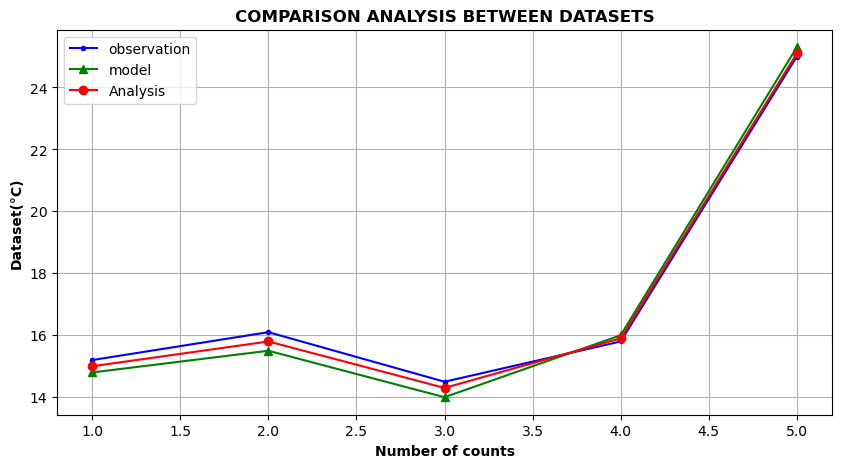

<Figure size 640x480 with 0 Axes>

In [23]:
#comparing analyzed data with Observation data
x = ([1, 2, 3, 4, 5])
observations = ([15.2, 16.1, 14.5, 15.8, 25.0])
model_output = ([14.8, 15.5, 14.0, 16.0, 25.3])
analysis_fields =([15.0, 15.8, 14.3, 15.9, 25.1])

# plotting of figure
fig = plt.subplots(figsize = (10,5))
plt.plot(x,observations,label="observation", color= "blue", marker = ".")
plt.plot(x,model_output, label = "model", color = "green", marker ="^")
plt.plot(x,analysis_fields, label = "Analysis", color = "red", marker = "o")
plt.legend()
plt.grid(True)
plt.title("COMPARISON ANALYSIS BETWEEN DATASETS", fontweight = "bold")
plt.xlabel("Number of counts", fontweight = "bold")
plt.ylabel("Dataset(°C)", fontweight = "bold")
plt.show()
plt.savefig("newWW.png")